# Classifing movie reviews

This problem consists in classifying movie reviews as positive or negative:
this is a two-class classification problem.

The reviews are taken from the IMDB dataset that consist in 50 000 reviews.
The reviews have been preprocessed: at each word of the dictionary has been assigned an integer, so in dataset a review is just a sequence of integers.  

### Extracting and pre-processing the data

In [2]:
# loading the dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
# visualizing data
print('review: ')
print(train_data[0])
print('label: ')
print(train_labels[0]) # note that each label can be either 1 or 0: 1 stands for a positive review; 0 for a negative one

review: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
label: 
1


In [4]:
# prepering the data: one hot encoding

import numpy as np

# this function return a matrix of dimensions (# of sequences) * (dimension of a sequence)
# at the row i we have the i-th reviews.
# in position [i][j] we have a value that can be either 1 or 0. If this value is 1 it means that the j-th word of the dictionary is in the review. 0 otherwise.
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence]  = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# osservazione: così facendo non perdiamo informazione sulle recensioni? sapere l'ordine delle parole è importante:
# RECENSIONE 1: non è un cattivo film, mi piace! --> chiaramente ha label 1
# ma le stesse parole portano alla recensione:
# RECENSIONE 2: è un cattivo film, non mi piace! --> chiaramente label 0.

# morale: esistono insiemi di parole che non implicano una label precisa.
# forse una seconda versione di questa NN potrebbe tenere conto dell'ordine delle parole.


In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# we also need to vectorize the labels: ( we need to make them a tensor)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
#now the data is ready to be fed to a NN

### Building the NN

In [7]:
from keras import models, layers

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [9]:
# compiling the model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
x_val = x_train[:10000] # x_val contains the first 10000 elements of the train dataset
partial_x_train = x_train[10000:] # partial x_train containst the elements from 10001 to -1 of the train dataset
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training the NN

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5536 - accuracy: 0.7612 - val_loss: 0.4243 - val_accuracy: 0.8528
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3436 - accuracy: 0.8904 - val_loss: 0.3260 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2566 - accuracy: 0.9147 - val_loss: 0.3114 - val_accuracy: 0.8725
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2070 - accuracy: 0.9300 - val_loss: 0.2762 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1756 - accuracy: 0.9408 - val_loss: 0.2759 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1488 - accuracy: 0.9530 - val_loss: 0.2813 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1285 - accuracy: 0.9601 - val_loss: 0.3420 - val_accuracy: 0.8694
Epoch 8/20
30

### Plotting results

In [12]:
import matplotlib.pyplot as plt

In [13]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


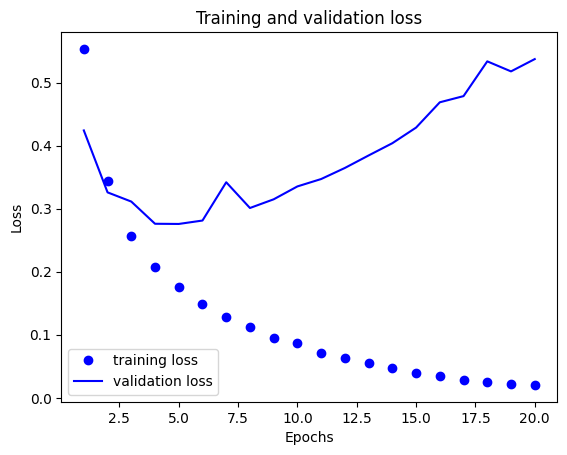

In [14]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

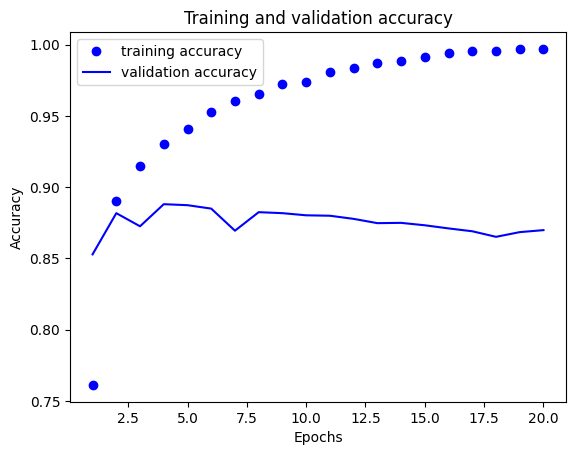

In [15]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

### Training a new network


In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)

In [ ]:
results = model.evaluate(x_train, y_train)

In [19]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.29316792],
       [0.9992369 ],
       [0.884491  ],
       ...,
       [0.15117535],
       [0.09562451],
       [0.73100036]], dtype=float32)